Instructions

**When taking this exam, you agree to follow the Duke Honor Code.**

- This is a closed book exam. You can use the `help()` function, and the `?` prefix or suffix but are restricted to a SINGLE browser tab.
- All necessary imports are provided. You should not need to import any other packages.
- Answer all 5 questions.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
from scipy import linalg as la

**1**. (20 points)

- Write a function to find where f(x) crosses zero using a bisection algorithm. The bisection algorithm works in the following way - given the left and right boundary, it checks if the crossing is between left and mid-point, or between the right and mid-point. If the former, the mid-point is set as the new right boundary and so on. In other words the interval containing the crossing is halved at each step. Stop when the length of the interval is less than 1e-6, and return the left and right boundaries at that point.
    - The function should have the signature `bisect(f, left=0, right=1, tol=1e-6)`
    - Use `bisect` to find the left and right intervals containing a zero (root) of the function $x^3 + 4x^2 - 1$ between 0 and 1.
    - <font color=red>Hint</font>: If the crossing is between left and right, the function evaluated at left and right must have opposite signs. (20 points)

- Plot the function together with a horizontal line for $y=0$ and a red circle at the root whose coordinates are (`left`, 0). The x-limits of the plot should be 0 and 1.

In [4]:
f = lambda x: x**3 + 4*x**2 - 1

In [16]:
def bisect(f,left = 0, right = 1, tol = 1e-6):
    mid = (left+right)/2
    while(abs(f(mid))>tol):
        if f(left)*f(mid)<0:
            right = mid
        elif f(right)*f(mid)<0:
            left = mid
        mid = (left+right)/2
    return(left,right)

In [29]:
left, right = bisect(f)

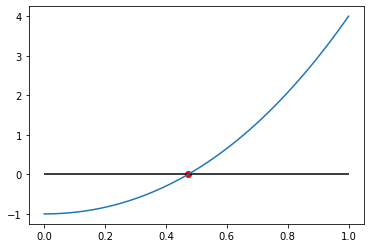

In [32]:
xp = np.linspace(0,1,100)
plt.plot(xp,f(xp))
plt.hlines(y=0, xmin = 0, xmax = 1)
plt.scatter(left,0,c="r")

**2**. (20 points)

Implement a Python function to find the minimum using the Newton-Raphson method. Use it to find a minimum of $x^3 + 4x^2 -3 = x$ given the initial location $x_0 = -1$. Do not use any library methods apart from those in `np` - the idea is to develop the algorithm using only basic Python language constructs.

In [53]:
f = lambda x : x**3 + 4*x**2 - x -3 
ff = lambda x: 3*x**2 + 8*x -1
fff = lambda x: 6*x + 8

In [54]:
x = -1

In [55]:
for i in range(100):
    x = x - ff(x)/fff(x)

In [56]:
x

0.11963298118022453

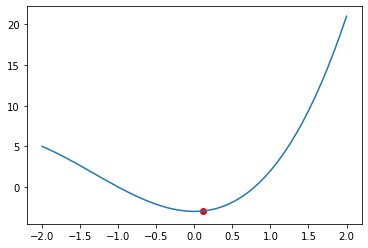

In [59]:
xp = np.linspace(-2,2)
yp = f(xp)
plt.plot(xp,yp+xp)
plt.scatter(x,f(x)+x,c = "r")

**3**. (20 points)

We observe some data points $(x_i, y_i)$, and believe that an appropriate model for the data is that

$$
f(x) = ax^2 + bx^3 + c\sin{x}
$$

with some added noise. Find optimal values of the parameters $\beta = (a, b, c)$ that minimize $\Vert y - f(x) \Vert^2$ using gradient descent with RMSprop (no bias correction) and starting with an initial value of $\beta = \begin{bmatrix}1 & 1 & 1\end{bmatrix}$. Use a learning rate of 0.01 and 10,000 iterations. This should take a few seconds to complete. (15 points)

Plot the data and fitted curve using `matplotlib`. (5 points)

Data
```
x = array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])
```

In [60]:
x = np.array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = np.array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])

In [66]:
def f(x,y,b):
    return b[0]*x**2 + b[1]*x**3 + b[2]*np.sin(x)
def grad_m(X,y,b):
    return X.T@X@b - X.T@y

In [61]:
X = np.c_[x**2, x**3, np.sin(x)]

In [64]:
b = [1,1,1]
a = 0.01 #learning rate
max_iter = 10000
beta = 0.9
eps = 1e-10
v = 0

In [67]:
for i in range(max_iter):
    v = beta*v + (1-beta)*grad_m(X,y,b)**2
    b = b - a*grad_m(X,y,b)/(eps+np.sqrt(v))

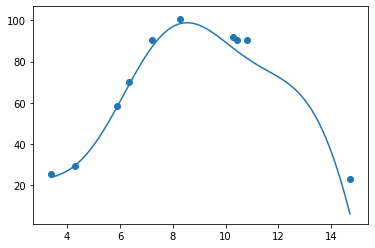

In [70]:
xp = np.linspace(x.min(),x.max(),100)
Xp = np.c_[xp**2, xp**3, np.sin(xp)]
yp = Xp@b
plt.plot(xp,yp)
plt.scatter(x,y)

**4**. (20 points)

Given the set of vectors

```
v1 = np.array([1,2,3])
v2 = np.array([2,4,7])
v3 = np.array([1,0,1])
```

1. Calculate the pairwise Euclidean distance matrix  (5 points)
2. Find an orthogonal basis for the space spanned by the vectors $v_1, v_2, v_3$ without using any functions from `numpy.linag` or `scipy.linalg` (5 points)
3. Use Gram-Schmidt decomposition to  find an orthogonal basis for the space spanned by the vectors $v_1, v_2, v_3$ where one of the basis vectors must be in the direction of $v_3$. (10 points)

In [80]:
v1 = np.array([1,2,3])
v2 = np.array([2,4,7])
v3 = np.array([1,0,1])

In [84]:
V = np.c_[v1,v2,v3].T
M = np.zeros(9).reshape(3,3)
for i,v in enumerate(V):
    for j,v_2 in enumerate(V):
        M[i,j] = np.sqrt(np.sum((v-v_2)**2))
M

In [91]:
e1 = v1
e2 = v2 - (e1.T@v2)/(e1.T@e1)*e1
e3 = v3 - (e1.T@v3)/(e1.T@e1)*e1 - (e2.T@v3)/(e2.T@e2)*e2
e1 = e1/np.sqrt(np.sum(e1**2))
e2 = e2/np.sqrt(np.sum(e2**2))
e3 = e3/np.sqrt(np.sum(e3**2))
Q = np.c_[e1,e2,e3]

In [96]:
V = np.c_[v3,v1,v2]
Q2,r = np.linalg.qr(V)
Q2, v3

(array([[-0.70710678,  0.40824829, -0.57735027],
        [-0.        , -0.81649658, -0.57735027],
        [-0.70710678, -0.40824829,  0.57735027]]), array([1, 0, 1]))

**5**. (20 points)

A milkmaid is at point A and needs to get to point B. However, she also needs to fill a pail of water from the river en route from A to B. The equation of the river's path is shown in the figure below. What is the minimum distance she has to travel to do this?

1. Solve using `scipy.optimize` and constrained minimization (15 points)
2. Plot the solution (5 point)

![Milkmaid problem](../data/milkmaid.png)

Hint: There is a local and a global optimum for this problem, so try different initial conditions.

In [98]:
f = lambda x: (x[0]-2)**2 +(x[0]-8)**2 + (x[1]-8)**2 + (x[1]-4)**2

In [109]:
x0 = (4,2)
cons = {'type':'eq','fun': lambda x: x[1]-10/(1+x[0])}
xopt,yopt = opt.minimize(f,x0,constraints=cons).x

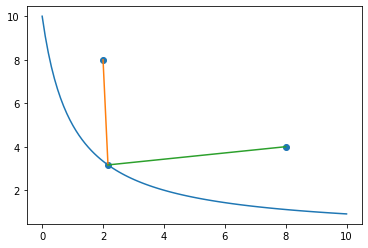

In [112]:
xp = np.linspace(0,10,100)
plt.scatter((2,xopt,8),(8,yopt,4))
plt.plot(xp,10/(1+xp))
plt.plot((2,xopt),(8,yopt))
plt.plot((xopt,8),(yopt,4))